In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels),(test_image, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape
#28*28 pixels por cada imagen

(60000, 28, 28)

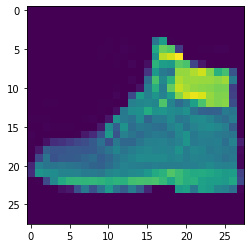

In [7]:
plt.imshow(train_images[90])

Estandarizacion de los valores para que queden de 0 a 1 de manera decimal.
Por que los pixeles de las imagens van de 0 a 255

In [10]:
train_images = train_images.astype('float32') / 255
test_image = test_image.astype('float32') / 255

In [11]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_image = test_image.reshape(test_image.shape[0],28,28,1)

In [12]:
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

MODELO DE DATOS

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding = 'same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()





COMPILAR - ENTRENAR

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, batch_size=64, epochs=30)

Epoch 1/30
938/938 [==============================] - 5s 5ms/step - loss: 0.4811 - accuracy: 0.8284
Epoch 2/30
938/938 [==============================] - 4s 5ms/step - loss: 0.4781 - accuracy: 0.8302
Epoch 3/30
938/938 [==============================] - 4s 5ms/step - loss: 0.4772 - accuracy: 0.8321
Epoch 4/30
938/938 [==============================] - 4s 5ms/step - loss: 0.4736 - accuracy: 0.8333
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.4766 - accuracy: 0.8314
Epoch 6/30
938/938 [==============================] - 4s 5ms/step - loss: 0.4766 - accuracy: 0.8320
Epoch 7/30
938/938 [==============================] - 4s 5ms/step - loss: 0.4753 - accuracy: 0.8316
Epoch 8/30
938/938 [==============================] - 5s 5ms/step - loss: 0.4759 - accuracy: 0.8321
Epoch 9/30
938/938 [==============================] - 5s 5ms/step - loss: 0.4753 - accuracy: 0.8310
Epoch 10/30
938/938 [==============================] - 4s 5ms/step - loss: 0.4774 - accuracy: 0.8324

In [26]:
model.evaluate(test_image, test_labels, verbose=0)

[946.0701904296875, 0.6651999950408936]